In [55]:
# import necessary packages
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

In [56]:
# Handle date time convertions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [57]:
# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel("ERROR")
import warnings
warnings.filterwarnings("ignore")


# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [58]:
# # Download the data
# data = et.data.get_data('colorado-flood')

# Set working directory
os.chdir(os.path.join(os.getcwd()))

# Define relative path to the data
file_path = os.path.join("colorado-flood","precipitation","805325-precip-daily-2003-2013.csv")

In [68]:
# Import data using datetime and no data value
boulder_precip_2003_2013 = pd.read_csv(file_path,
                                       # Make sure the dates import in datetime format
                                       parse_dates=['DATE'],
                                       # Set DATE as the index so you can subset data by time period
                                       index_col=['DATE'],
                                       # Mask no data values so they are not plotted / used in analysis
                                       na_values=['999.99'])

# View the data
boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [69]:
# Look at the range of values in the data - specifically the HPCP column
boulder_precip_2003_2013["HPCP"].describe()

count    1746.000000
mean        0.111856
std         0.093222
min         0.000000
25%         0.100000
50%         0.100000
75%         0.100000
max         2.200000
Name: HPCP, dtype: float64

In [62]:
boulder_precip_2003_2013.dtypes

STATION              object
STATION_NAME         object
ELEVATION           float64
LATITUDE            float64
LONGITUDE           float64
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

In [63]:
boulder_precip_2003_2013.index
# boulder_precip_2003_2013.reindex()

DatetimeIndex(['2003-01-01 01:00:00', '2003-02-01 01:00:00',
               '2003-02-02 19:00:00', '2003-02-02 22:00:00',
               '2003-02-03 02:00:00', '2003-02-05 02:00:00',
               '2003-02-05 08:00:00', '2003-02-06 00:00:00',
               '2003-02-07 12:00:00', '2003-02-10 13:00:00',
               ...
               '2013-12-01 01:00:00', '2013-12-03 20:00:00',
               '2013-12-04 03:00:00', '2013-12-04 06:00:00',
               '2013-12-04 09:00:00', '2013-12-22 01:00:00',
               '2013-12-23 00:00:00', '2013-12-23 02:00:00',
               '2013-12-29 01:00:00', '2013-12-31 00:00:00'],
              dtype='datetime64[ns]', name='DATE', length=1840, freq=None)

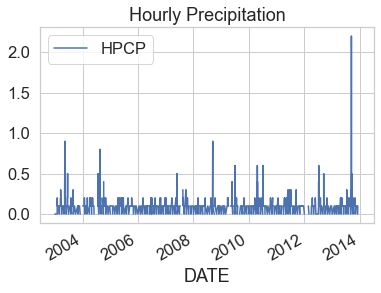

In [65]:
boulder_precip_2003_2013.plot(y="HPCP",title = "Hourly Precipitation")
plt.show()

In [70]:
# Subset data from 2005
precip_2005 = boulder_precip_2003_2013['2005']
precip_2005.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2005-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2005-01-02 06:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,{,
2005-01-02 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,},
2005-01-05 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-01-12 04:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [71]:
# Remove missing data values
precip_2005_clean = precip_2005.dropna()

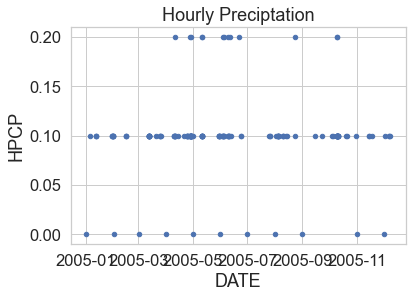

In [75]:
# Plot the data using pandas
precip_2005_clean.reset_index().plot(x = "DATE",
                                     y = "HPCP",
                                     title = "Hourly Preciptation",
                                     kind = "scatter")
plt.show()

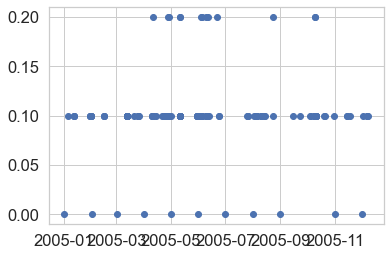

In [76]:
# Plot the data using native matplotlib
f,ax = plt.subplots()
ax.scatter(x = precip_2005_clean.index.values,
           y = precip_2005_clean["HPCP"])
plt.show()

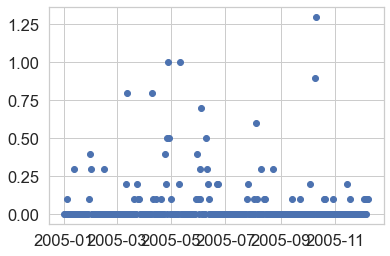

In [80]:
precip_2005_daily =  precip_2005_clean.resample("D").sum()
# Plot the data using native matplotlib
f, ax = plt.subplots()
ax.scatter(x = precip_2005_daily.index.values,
           y = precip_2005_daily['HPCP'])

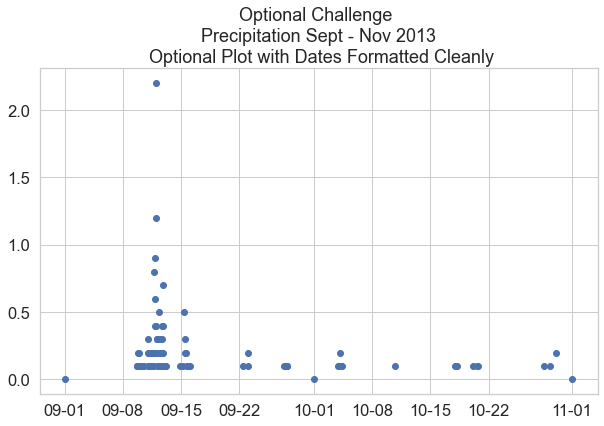

In [82]:
from matplotlib.dates import DateFormatter

# Place your code to plot your data here
flood_data = boulder_precip_2003_2013['2013-09-01':'2013-11-01']

f, ax = plt.subplots(figsize = (10,6))
ax.scatter(x = flood_data.index.values,
           y = flood_data["HPCP"])

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.set(title = "Optional Challenge \n Precipitation Sept - Nov 2013 \n Optional Plot with Dates Formatted Cleanly")
plt.show()